# Excercise 3
## Neural Networks in Keras and Pytorch 🔥

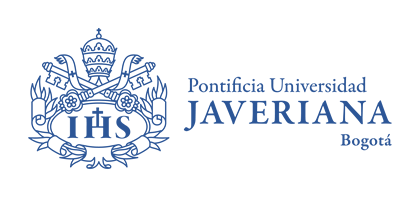

### **Profesor**
* Sergio Mora
### **Integrantes**
* Javier Acero 
* Gerson Gaitan 
* Juan Sebastian Amaya Velasco
* Diana Marcela González Figueroa

Use keras framework to solve the below exercises.


In [1]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 5 Moons Dataset

**Exercise:** Use keras and pytorch framework to find a decision boundary for point in the make_moons.

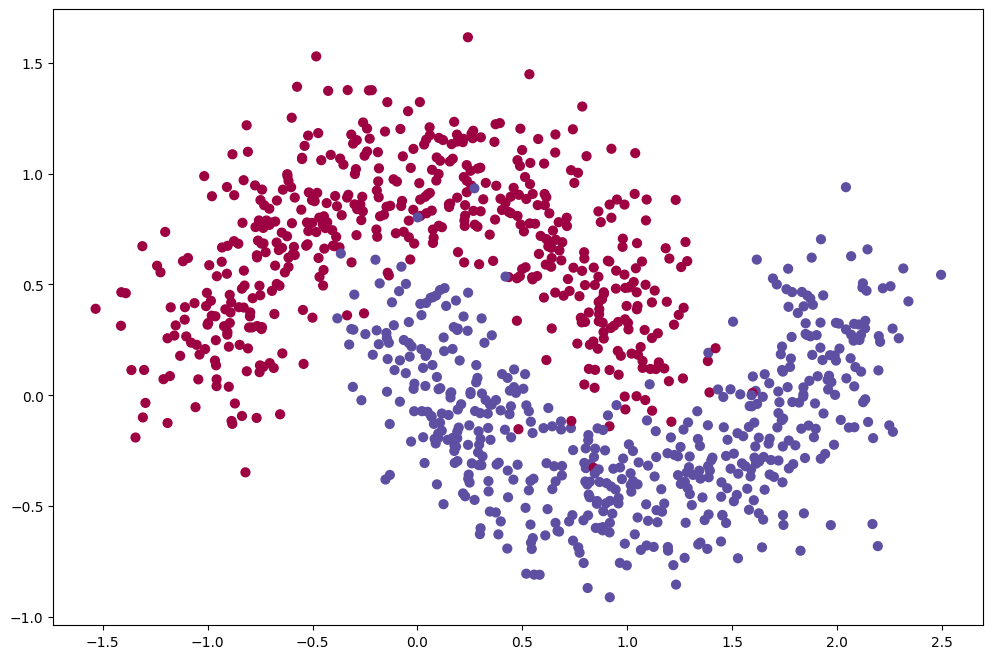

In [2]:
# Create moons dataset.

from sklearn.datasets import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

# 5.1 Decision Boundary -- Keras

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

**Hint:** Use the next function to plt the decision boundary,

In [3]:
model = 'Sequential neural network in keras'

# modelo secuencial en Keras

model = Sequential()
model.add(Dense(16, input_shape=(2,), activation='relu'))  # Más neuronas en la primera capa
model.add(Dense(8, activation='relu'))  # Segunda capa oculta
model.add(Dense(4, activation='relu'))  # Tercera capa oculta
model.add(Dense(1, activation='sigmoid'))  # Capa de salida


optimizer = Adam(learning_rate=0.001)  # Tasa de aprendizaje más baja
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200,verbose=0)

def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

plt.figure(figsize = (8,16/3))
'''
Here 'model' is the neural network you previous trained.
'''
# plot_decision_region(model, x_train, pred_fun)


"\nHere 'model' is the neural network you previous trained.\n"

<Figure size 800x533.333 with 0 Axes>

32/32 [==============================] - 0s 2ms/step


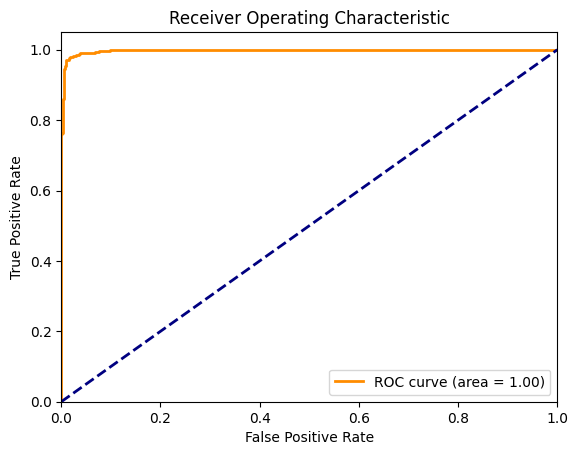

AUC: 0.9971


In [4]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las predicciones del modelo
y_pred = model.predict(x_train).ravel()

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Imprimir el valor de AUC
print(f'AUC: {roc_auc:.4f}')

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 24ms/step


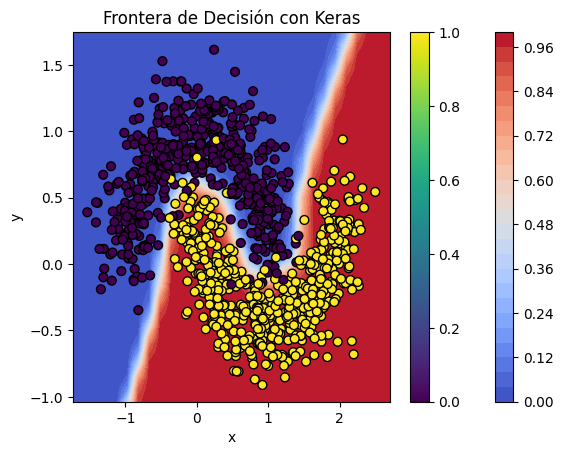

In [5]:
import numpy as np

plot_decision_region(model, x_train, pred_fun)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=40, edgecolors='k', cmap=plt.cm.viridis)
plt.title("Frontera de Decisión con Keras")
plt.colorbar()
plt.show()

### Resumen de la Arquitectura

| Capa      | Tipo   | Neuronas | Función de Activación |
|-----------|--------|----------|-----------------------|
| Entrada   | Dense  | 16       | ReLU                  |
| Oculta 1  | Dense  | 8        | ReLU                  |
| Oculta 2  | Dense  | 4        | ReLU                  |
| Salida    | Dense  | 1        | Sigmoid               |


#### Modelo
Optimizador: Se utiliza el optimizador Adam con una tasa de aprendizaje de 0.001.

Función de Pérdida: binary_crossentropy. Esta función de pérdida es adecuada para problemas de clasificación binaria.

Métrica: accuracy. Se utiliza la precisión (accuracy) como métrica para evaluar el rendimiento del modelo durante el entrenamiento.

# 5.2 Decision Boundary -- PyTorch 🔥

**Exercise:** Use PyTorch to find a decision boundary for point in the make_moons.

**Hint:** Use the next function to plt the decision boundary, 

In [6]:
# Importar librerias
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

Text(0.5, 1.0, 'Distribución de los datos make_moons')

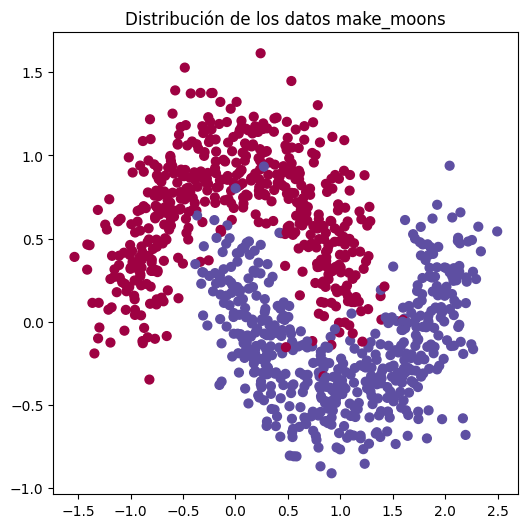

In [7]:
# Generar datos make_moons 
x_train, y_train = make_moons(n_samples=1000, noise=0.2, random_state=3)
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

# Gráfica de los datos
plt.figure(figsize=(6, 6))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.title("Distribución de los datos make_moons") 

### Modelo de Redes Neuronales con Pytorch

Época 0: Loss = 0.7130, Accuracy = 0.5000
Época 100: Loss = 0.1244, Accuracy = 0.9630
Época 200: Loss = 0.0704, Accuracy = 0.9750
Época 300: Loss = 0.0659, Accuracy = 0.9770
Época 400: Loss = 0.0643, Accuracy = 0.9770
Época 500: Loss = 0.0638, Accuracy = 0.9790
Época 600: Loss = 0.0634, Accuracy = 0.9790
Época 700: Loss = 0.0632, Accuracy = 0.9790
Época 800: Loss = 0.0622, Accuracy = 0.9770
Época 900: Loss = 0.0618, Accuracy = 0.9780


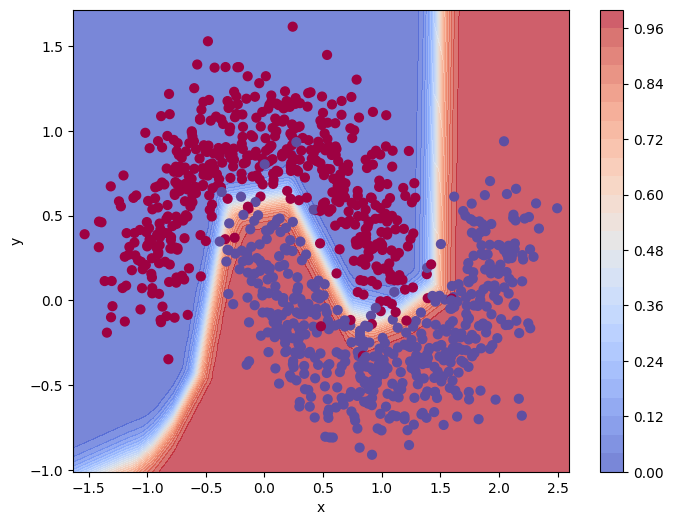

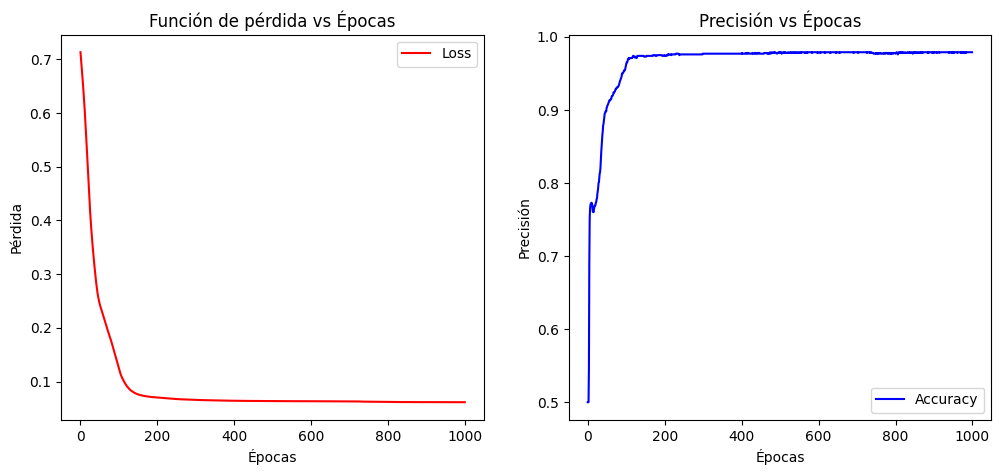

In [9]:
# Definir la red neuronal en PyTorch
class NeuralNet_PyTorch(nn.Module):
    def __init__(self):
        super(NeuralNet_PyTorch, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.activation = nn.ReLU()
        self.output = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.output(self.fc3(x))
        return x

# Instanciar el modelo y definir la función de pérdida y optimizador
model = NeuralNet_PyTorch()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Variables para almacenar métricas
epochs = 1000
losses = []   # Almacenar la pérdida en cada época
accuracies = []  # Almacenar la precisión en cada época

# Entrenar el modelo
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    # Guardar la pérdida
    losses.append(loss.item())

    # Calcular precisión (accuracy)
    preds = (output.detach().numpy() >= 0.5).astype(int)
    acc = np.mean(preds == y_train.numpy())
    accuracies.append(acc)

    # Mostrar progreso cada 100 épocas
    if epoch % 100 == 0:
        print(f"Época {epoch}: Loss = {loss.item():.4f}, Accuracy = {acc:.4f}")


# Función para graficar la frontera de decisión
def plot_decision_region(model, X):
    min_x, max_x = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    min_y, max_y = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_points = np.c_[XX.ravel(), YY.ravel()]
    
    # Convertir a tensor y predecir
    with torch.no_grad():
        predictions = model(torch.tensor(grid_points, dtype=torch.float32))
        ZZ = predictions.reshape(XX.shape).numpy()

    plt.contourf(XX, YY, ZZ, levels=30, cmap=plt.cm.coolwarm, alpha=0.7)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

# Graficar los datos y la frontera de decisión
plt.figure(figsize=(8, 6))
plot_decision_region(model, x_train.numpy())
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.numpy().flatten(), s=40, cmap=plt.cm.Spectral)
plt.show()

# Graficar función de pérdida vs épocas
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), losses, label="Loss", color="red")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Función de pérdida vs Épocas")
plt.legend()

# Graficar precisión vs épocas
plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracies, label="Accuracy", color="blue")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.title("Precisión vs Épocas")
plt.legend()

plt.show()

## Modelo de Redes Neuronales con Pytorch - Separación Train y Test

Época 0: Loss Train = 0.7053, Loss Test = 0.7007
Época 100: Loss Train = 0.1525, Loss Test = 0.1963
Época 200: Loss Train = 0.0776, Loss Test = 0.0830
Época 300: Loss Train = 0.0751, Loss Test = 0.0829
Época 400: Loss Train = 0.0744, Loss Test = 0.0832
Época 500: Loss Train = 0.0736, Loss Test = 0.0825
Época 600: Loss Train = 0.0728, Loss Test = 0.0832
Época 700: Loss Train = 0.0721, Loss Test = 0.0832
Época 800: Loss Train = 0.0717, Loss Test = 0.0820
Época 900: Loss Train = 0.0714, Loss Test = 0.0826


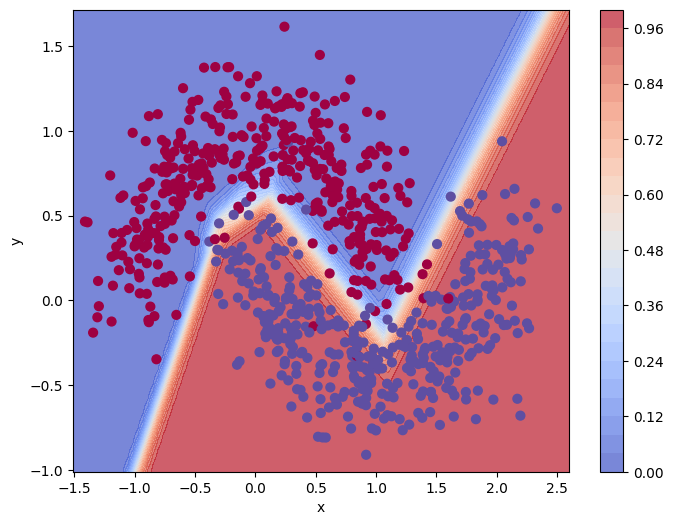


 MÉTRICAS DE EVALUACIÓN
Accuracy     : 0.9750
Precision    : 0.9789
Recall (Sensibilidad) : 0.9688
F1-Score     : 0.9738
AUC-ROC      : 0.9960


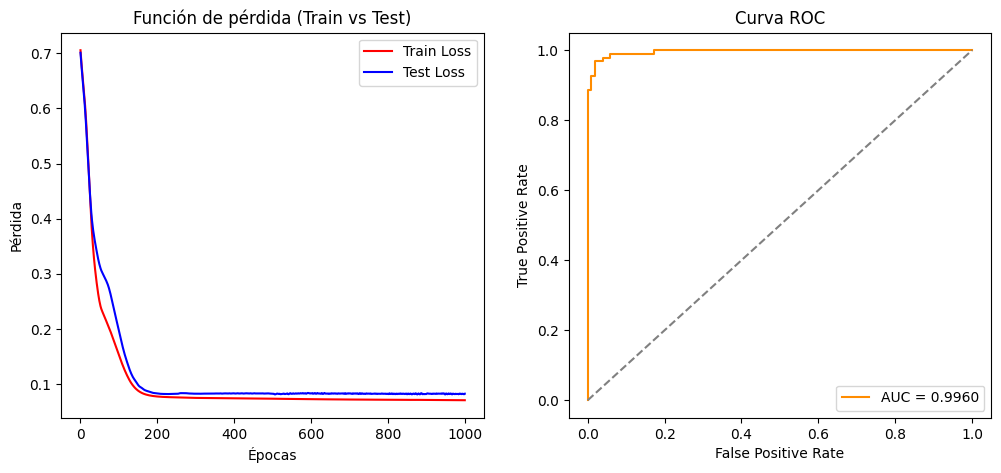

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Generar datos make_moons y separar en train y test
x, y = make_moons(n_samples=1000, noise=0.2, random_state=3)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Convertir a tensores
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Definir la red neuronal en PyTorch
class NeuralNet_PyTorch(nn.Module):
    def __init__(self):
        super(NeuralNet_PyTorch, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.activation = nn.ReLU()
        self.output = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.output(self.fc3(x))
        return x

# Instanciar el modelo y definir la función de pérdida y optimizador
model = NeuralNet_PyTorch()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Variables para almacenar métricas
epochs = 1000
losses_train = []
losses_test = []

# Entrenar el modelo
for epoch in range(epochs):
    optimizer.zero_grad()
    output_train = model(x_train)
    loss_train = criterion(output_train, y_train)
    loss_train.backward()
    optimizer.step()

    # Evaluar en test sin modificar los pesos
    with torch.no_grad():
        output_test = model(x_test)
        loss_test = criterion(output_test, y_test)

    # Guardar pérdidas
    losses_train.append(loss_train.item())
    losses_test.append(loss_test.item())

    # Mostrar progreso cada 100 épocas
    if epoch % 100 == 0:
        print(f"Época {epoch}: Loss Train = {loss_train.item():.4f}, Loss Test = {loss_test.item():.4f}")

# Función para graficar la frontera de decisión
def plot_decision_region(model, X):
    min_x, max_x = X[:, 0].min()-0.1, X[:, 0].max()+0.1
    min_y, max_y = X[:, 1].min()-0.1, X[:, 1].max()+0.1
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_points = np.c_[XX.ravel(), YY.ravel()]
    
    # Convertir a tensor y predecir
    with torch.no_grad():
        predictions = model(torch.tensor(grid_points, dtype=torch.float32))
        ZZ = predictions.reshape(XX.shape).numpy()

    plt.contourf(XX, YY, ZZ, levels=30, cmap=plt.cm.coolwarm, alpha=0.7)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

# Graficar los datos y la frontera de decisión
plt.figure(figsize=(8, 6))
plot_decision_region(model, x_train.numpy())
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train.numpy().flatten(), s=40, cmap=plt.cm.Spectral)
plt.show()

# --- Evaluación del modelo ---
with torch.no_grad():
    y_pred_prob = model(x_test).numpy().flatten()  # Probabilidades
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Clasificación binaria

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Imprimir métricas
print("\n MÉTRICAS DE EVALUACIÓN")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall (Sensibilidad) : {recall:.4f}")
print(f"F1-Score     : {f1:.4f}")
print(f"AUC-ROC      : {roc_auc:.4f}")

# --- Gráficos ---
plt.figure(figsize=(12, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(range(epochs), losses_train, label="Train Loss", color="red")
plt.plot(range(epochs), losses_test, label="Test Loss", color="blue")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Función de pérdida (Train vs Test)")
plt.legend()

# Gráfico de curva ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()

plt.show()


## Análisis Modelo de Redes Neuronales con Pytorch

1. Se realizó un modelo de redes neuronales con librería Pytorch

2. La arquitectura de la red neuronal es: 
* 2 neuronas de entrada (ya que make_moons genera datos 2D)
* 2 capas ocultas con 10 neuronas y activación ReLU
* 1 neurona de salida con activación Sigmoide (para clasificación binaria)
* Función de pérdida: BCELoss() (Binary Cross-Entropy, para problemas de clasificación binaria)
* Optimizador: Adam() con tasa de aprendizaje (lr=0.01)

3. Se entrenó el modelo con 1.000 épocas y se ajustan pesos con backward() y step()

4. Resultados del Modelo:
* El rendimiento del modelo es muy bueno, donde se observa separación optima de puntos azules y rojos con pocos errores de clasificación
* Las métricas de evaluación del modelo son muy buenas con resultados sobre el 95% en Accuracy 96%, Precision 95.83%, Sensibilidad 95.83%, F1-score 95.83% y AUC del 99.6%
* La función de pérdida utilizada Binary Cross Entropy Loss (BCELoss) vs las epocas, demuestra que desde la epoca 200 empieza a mejorar el modelo en su predicción 
* El modelo no presentaria sobreajuste ya que la función de perdida de train y test son muy cercanas
